# 智能供应链分析

1. 数据集：SupplyChainDataset.csv，供应链采购数据
2. 任务：供应链数据探索

# 数据探索

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 数据读取
raw = pd.read_csv('./SupplyChain.csv', encoding='unicode_escape')
raw.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [4]:
# 缺失值检查
raw_null = raw.isnull().sum()
raw_null[raw_null !=0] / len(raw) * 100

Customer Lname           0.004432
Customer Zipcode         0.001662
Order Zipcode           86.239676
Product Description    100.000000
dtype: float64

In [5]:
# 重复值查看
raw.duplicated().sum()

0

In [6]:
# 非法值查看
raw[raw.select_dtypes('object').columns]

,Type,Delivery Status,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Lname,Customer Password,Customer Segment,...,Order City,Order Country,order date (DateOrders),Order Region,Order State,Order Status,Product Image,Product Name,shipping date (DateOrders),Shipping Mode
0,DEBIT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,Holloway,XXXXXXXXX,Consumer,...,Bekasi,Indonesia,1/31/2018 22:56,Southeast Asia,Java Occidental,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,2/3/2018 22:56,Standard Class
1,TRANSFER,Late delivery,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,Luna,XXXXXXXXX,Consumer,...,Bikaner,India,1/13/2018 12:27,South Asia,Rajastán,PENDING,http://images.acmesports.sports/Smart+watch,Smart watch,1/18/2018 12:27,Standard Class
2,CASH,Shipping on time,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,Maldonado,XXXXXXXXX,Consumer,...,Bikaner,India,1/13/2018 12:06,South Asia,Rajastán,CLOSED,http://images.acmesports.sports/Smart+watch,Smart watch,1/17/2018 12:06,Standard Class
3,DEBIT,Advance shipping,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,Tate,XXXXXXXXX,Home Office,...,Townsville,Australia,1/13/2018 11:45,Oceania,Queensland,COMPLETE,http://images.acmesports.sports/Smart+watch,Smart watch,1/16/2018 11:45,Standard Class
4,PAYMENT,Advance shipping,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,Hendricks,XXXXXXXXX,Corporate,...,Townsville,Australia,1/13/2018 11:24,Oceania,Queensland,PENDING_PAYMENT,http://images.acmesports.sports/Smart+watch,Smart watch,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,CASH,Shipping on time,Fishing,Brooklyn,EE. UU.,XXXXXXXXX,Maria,Peterson,XXXXXXXXX,Home Office,...,Shanghái,China,1/16/2016 3:40,Eastern Asia,Shanghái,CLOSED,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 3:40,Standard Class
180515,DEBIT,Late delivery,Fishing,Bakersfield,EE. UU.,XXXXXXXXX,Ronald,Clark,XXXXXXXXX,Corporate,...,Hirakata,Japón,1/16/2016 1:34,Eastern Asia,Osaka,COMPLETE,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/19/2016 1:34,Second Class
180516,TRANSFER,Late delivery,Fishing,Bristol,EE. UU.,XXXXXXXXX,John,Smith,XXXXXXXXX,Corporate,...,Adelaide,Australia,1/15/2016 21:00,Oceania,Australia del Sur,PENDING,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/20/2016 21:00,Standard Class
180517,PAYMENT,Advance shipping,Fishing,Caguas,Puerto Rico,XXXXXXXXX,Mary,Smith,XXXXXXXXX,Consumer,...,Adelaide,Australia,1/15/2016 20:18,Oceania,Australia del Sur,PENDING_PAYMENT,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,1/18/2016 20:18,Standard Class


## 相关性

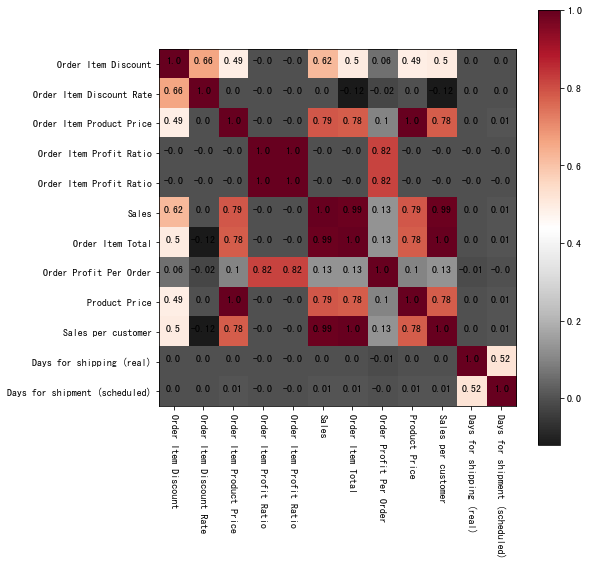

In [7]:
# 相关性
corr_col = ['Order Item Discount', 'Order Item Discount Rate', 
            'Order Item Product Price', 'Order Item Profit Ratio',
            'Order Item Profit Ratio', 'Sales', 'Order Item Total',
            'Order Profit Per Order', 'Product Price', 'Sales per customer',
            'Days for shipping (real)', 'Days for shipment (scheduled)']
corr_data = np.around(raw[corr_col].corr(), 2).values
plt.figure(figsize=(8, 8))
plt.imshow(corr_data, cmap='RdGy_r')
plt.xticks([x for x in range(len(corr_col))], corr_col, rotation=270)
plt.yticks([x for x in range(len(corr_col))], corr_col)
for r_idx, i in enumerate(corr_data):
    for c_idx, value in enumerate(i):
        plt.text(r_idx, c_idx, value, ha='center')
plt.colorbar()
plt.show()

## 销售额探索

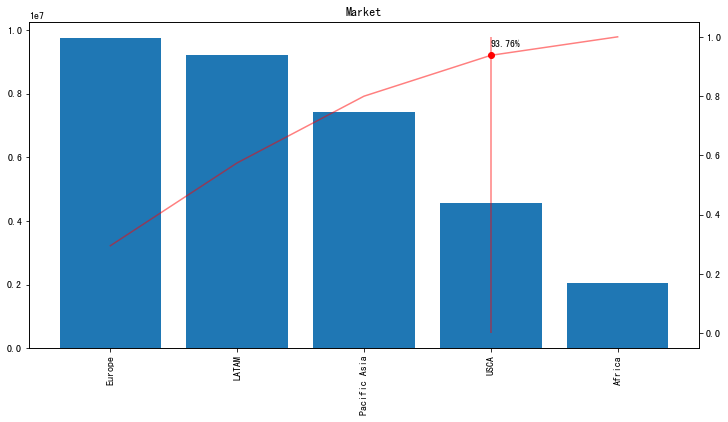

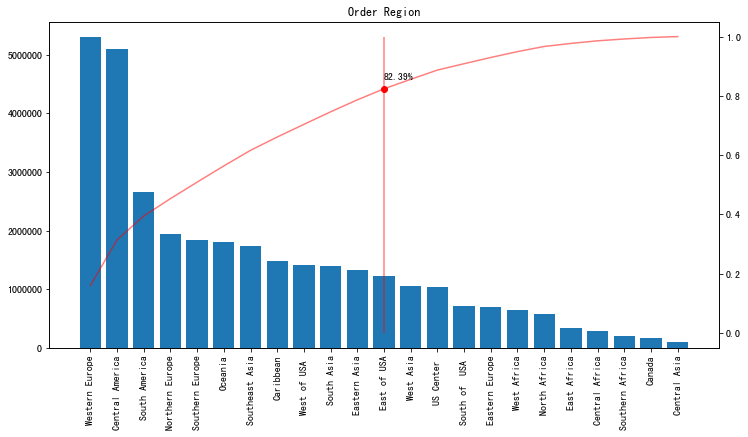

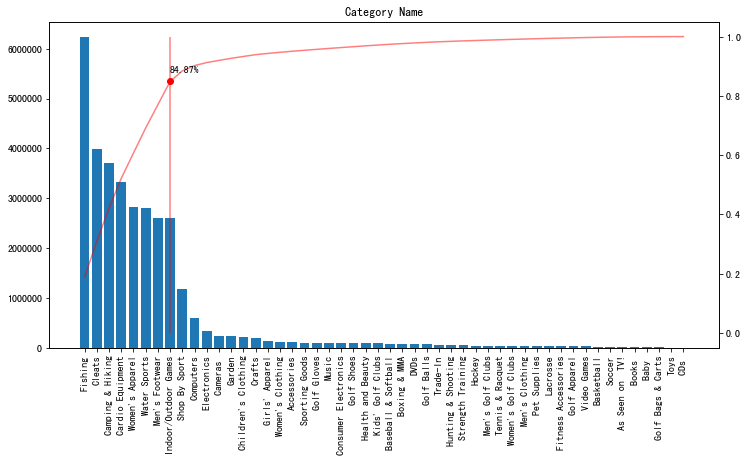

In [8]:
# 不同的 Market、Order Region、Category Name
for col in ['Market', 'Order Region', 'Category Name']:
    temp_df = pd.DataFrame(raw.groupby(col)['Sales per customer'].sum().sort_values(ascending=False).reset_index())
    temp_df['cumsum'] = temp_df['Sales per customer'].cumsum()
    temp_df['p'] = temp_df['cumsum'] / temp_df['Sales per customer'].sum()
    mark80_index = temp_df['p'][temp_df['p']>0.8].index[0]
    mark80_value = temp_df['p'].iloc[mark80_index]

    fig = plt.figure(figsize=(12, 6))
    
    ax1 = fig.add_subplot(111)
    ax1.bar(temp_df[temp_df.columns[0]], temp_df['Sales per customer'])
    for tick in ax1.get_xticklabels():
        tick.set_rotation(90)
    
    ax2 = ax1.twinx()
    ax2.plot(temp_df['p'], color='r', alpha=0.5)   
    ax2.vlines(mark80_index, 0, 1, color='r', alpha=0.5)
    ax2.scatter(mark80_index, mark80_value, color='r')
    ax2.text(mark80_index, mark80_value+0.03, '{:.2f}%'.format(mark80_value*100))
    
    plt.title(col)    
    plt.show()

In [9]:
# 按照不同的时间维度（年，月，星期，小时）的趋势 Product Price与Sales per customer 相关性如何
temp_raw = raw[['Product Price', 'Sales per customer']]
temp_raw.index = pd.to_datetime(raw['order date (DateOrders)'])
for i in ['y', 'M', 'W', 'H']:
    print('resample by {}: {:.2f}%'.format(i, temp_raw.resample(i).sum()[['Product Price', 'Sales per customer']].corr().values[0][1]*100))

resample by y: 99.49%
resample by M: 76.30%
resample by W: 86.73%
resample by H: 89.70%


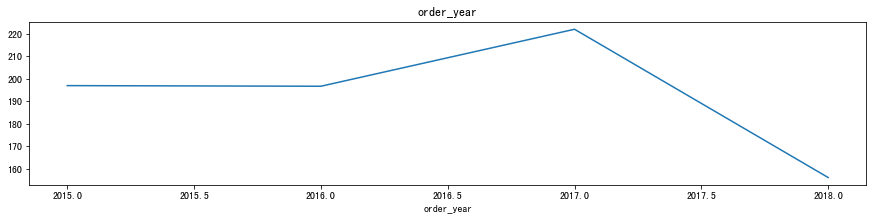

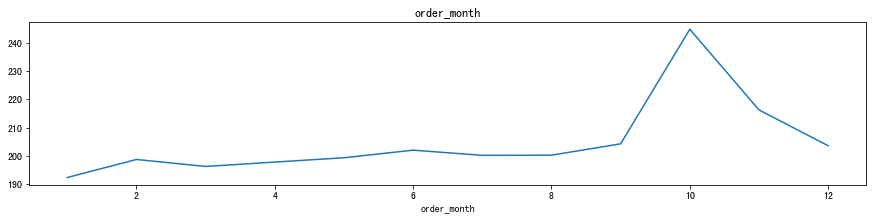

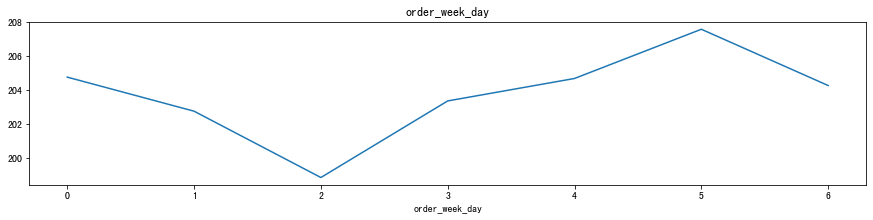

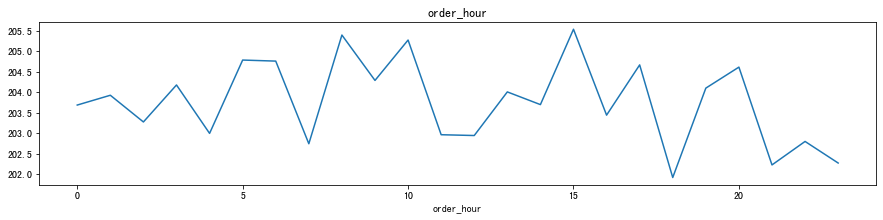

In [10]:
# 按年，月，星期，小时查看趋势
temp = pd.DatetimeIndex(raw['order date (DateOrders)'])
temp_raw = raw.copy()
temp_raw['order_year'] = temp.year
temp_raw['order_month'] = temp.month
temp_raw['order_week_day'] = temp.weekday
temp_raw['order_hour'] = temp.hour
temp_raw['order_month_year'] = temp.to_period('M')

for i in ['order_year', 'order_month', 'order_week_day', 'order_hour']:
    temp_raw.groupby(i)['Sales'].mean().plot(figsize=(15, 3), title=i)
    plt.show()

## 每个地区支付类型探索

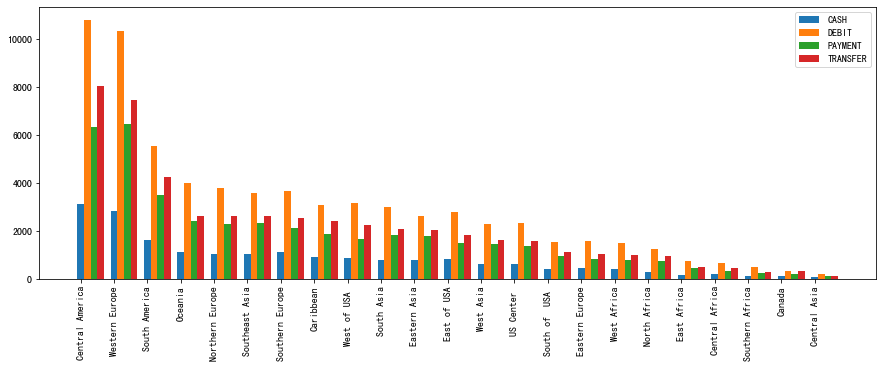

In [11]:
# 条形图
region_list = raw['Order Region'].value_counts().index

temp = 0
plt.figure(figsize=(15, 5))
for i, j in raw.groupby('Type'):
    plt.bar([x+temp for x in range(j['Order Region'].nunique())], j['Order Region'].value_counts()[region_list], width=0.2, label=i)
    temp += 0.2
plt.xticks([x for x in range(len(region_list))], region_list, rotation='vertical')
plt.legend()
plt.show()

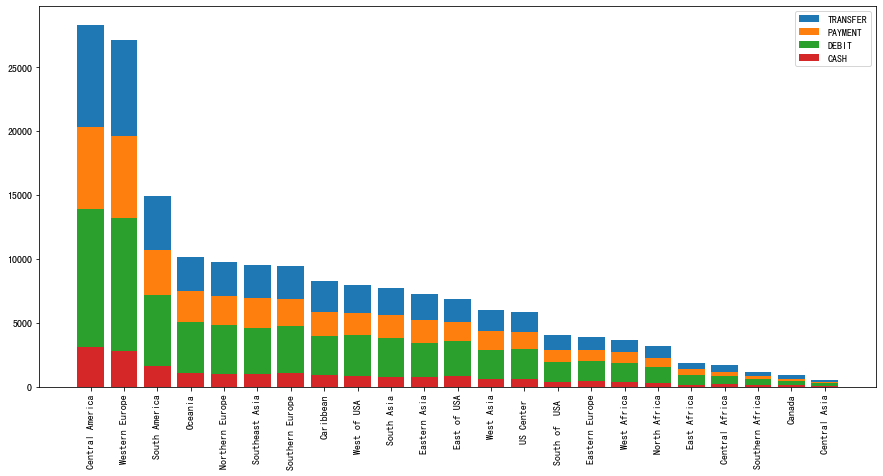

In [12]:
# 堆积图
temp_list = []
label_list = []

for i, j in raw.groupby('Type'):
    if temp_list:
        temp_list.append(j['Order Region'].value_counts()[region_list].values + temp_list[-1])
    else:
        temp_list.append(j['Order Region'].value_counts()[region_list].values)
    label_list.append(i)

plt.figure(figsize=(15, 7))    
for i, j in zip(temp_list[::-1], label_list[::-1]):
    plt.bar([x for x in range(raw['Order Region'].nunique())], i, label=j)
plt.xticks([x for x in range(len(region_list))], region_list, rotation='vertical')
plt.legend()
plt.show()

## 负收益产品探索

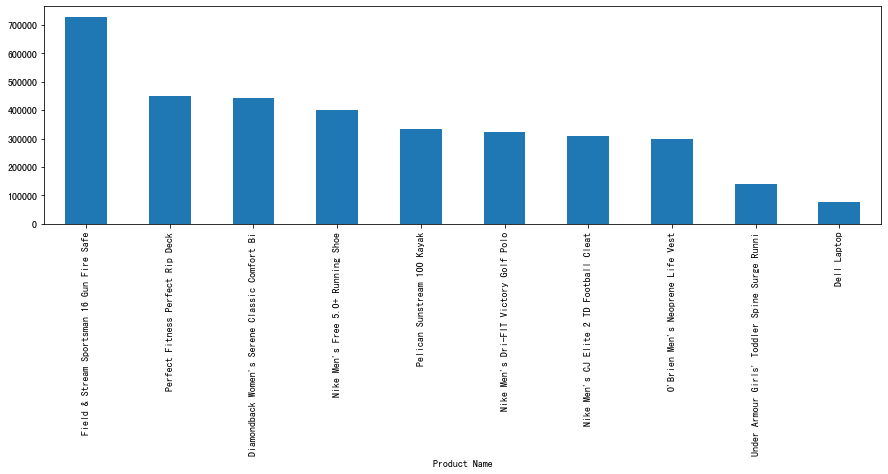

In [13]:
# 负收益产品前10
(-raw[raw['Order Profit Per Order'] < 0].groupby('Product Name')['Order Profit Per Order'].sum()).nlargest(10).plot(kind='bar', figsize=(15, 4))
plt.show()

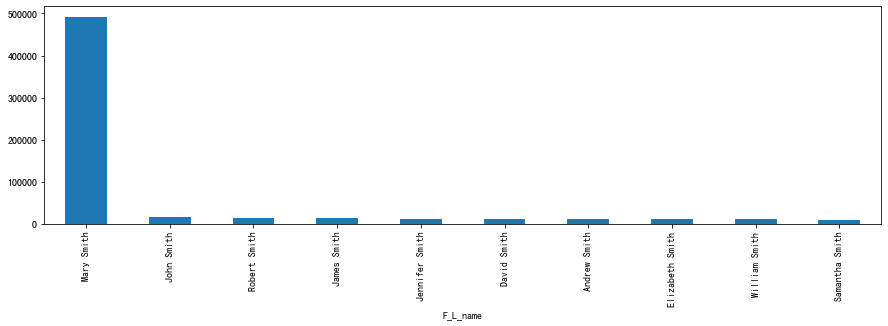

In [14]:
# 负收益客户前 10
temp_raw['F_L_name'] = temp_raw['Customer Fname'] + ' ' + temp_raw['Customer Lname']
(-temp_raw[temp_raw['Order Profit Per Order'] < 0].groupby('F_L_name')['Order Profit Per Order'].sum()).nlargest(10).plot(kind='bar', figsize=(15, 4))
plt.show()

## RFM 用户分类

1. R -> 最近一次消费间隔（单位：天）
2. F -> 消费频率（单位：天）
3. M -> 消费金额（单位：元）
4. 等频分桶，每个维度分4个level

In [15]:
def value_level(x, q_list, reverse=False):

    # 等级顺序
    level_list = [x for x in range(1, len(q_list)+2)]
    if reverse:
        level_list = level_list[::-1]
    
    # 循环比较等级值
    for idx, i in enumerate(q_list):
        if x <= i:
            return level_list[idx]
    else:
        return level_list[-1]

In [16]:
def RMF_level(r, m, f):
    if r >= 3 and m >=3 and f >= 3:
        return '重要价值用户'
    elif r >= 3 and m < 3 and f >= 3:
        return '重要发展用户'
    elif r < 3 and m >= 3 and f >= 3:
        return '重要保持用户'
    elif r < 3 and m < 3 and f >= 3:
        return '重要挽留用户'
    elif r >= 3 and m >= 3 and f < 3:
        return '一般价值用户'
    elif r >= 3 and m < 3 and f < 3:
        return '一般发展用户'
    elif r < 3 and m >= 3 and f < 3:
        return '一般保持用户'
    elif r < 3 and m < 3 and f < 3:
        return '一般挽留用户'    

In [17]:
def get_RMF(df, start, end):
    
    # 格式转换
    df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
    
    # 提取 R
    now_time = pd.to_datetime(start)
    R = df.sort_index().groupby('Customer Id')['order date (DateOrders)'].last().reset_index()
    R['R'] = (now_time - R['order date (DateOrders)']).dt.days
    
    # 提取 F
    F = df.sort_index().groupby('Customer Id').size().reset_index().rename(columns={0:'F'})
    
    # 提取 M
    M = df.sort_index().groupby('Customer Id')['Order Item Product Price'].sum().reset_index().rename(columns={'Order Item Product Price': 'M'})
    
    # 合并 RFM
    result = pd.concat([R['Customer Id'], R['R'], F['F'], M['M']], axis=1)
    
    # 计算 R、F、M 的等级 level
    for i, j in zip(['R', 'F', 'M'],[True, False, False]):
        col_name = '{}_level'.format(i)
        q_list = result[i].quantile([0.25, 0.5, 0.75]).values
        result[col_name] = result[i].apply(value_level, args=(q_list, False))
    
    # 计算 RFM 等级
    result['RMF_level'] = None
    for idx, i in result.iterrows():
        result.loc[idx, ['RMF_level']] = RMF_level(i['R_level'], i['M_level'], i['F_level'])
    
    # 重新排列的顺序
    return result[['Customer Id', 'R','R_level', 'F', 'F_level', 'M', 'M_level', 'RMF_level']]

In [18]:
# RFM 以最近的时间为当天值
df_RMF = get_RMF(raw, '2018-2-01', '2015-01-01')
df_RMF

,Customer Id,R,R_level,F,F_level,M,M_level,RMF_level
0,1,792,4,1,1,99.989998,1,一般发展用户
1,2,905,4,10,3,1399.860035,3,重要价值用户
2,3,306,2,18,4,2687.800074,4,重要保持用户
3,4,995,4,14,3,719.850014,2,重要发展用户
4,5,523,3,7,2,754.900024,2,一般发展用户
...,...,...,...,...,...,...,...,...
20647,20753,0,1,1,1,215.820007,1,一般挽留用户
20648,20754,0,1,1,1,215.820007,1,一般挽留用户
20649,20755,0,1,1,1,327.750000,2,一般挽留用户
20650,20756,0,1,1,1,11.540000,1,一般挽留用户


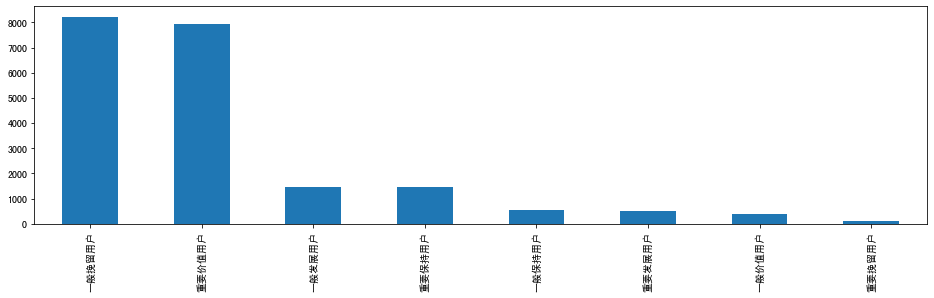

In [19]:
df_RMF['RMF_level'].value_counts().plot.bar(figsize=(16, 4))
plt.show()

# 预测任务
* 任务1: 欺诈订单预测（Order Status='SUSPECTED_FRAUD'）
* 任务2: 交货订单预测（Delivery Status= 'Late delivery'）

## 数据清洗

In [20]:
useless_col = ['Category Id', 'Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Id', 
               'Customer Password', 'Department Id', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id',
               'Order Item Id', 'Product Card Id', 'Product Description', 'Product Image', 'Product Name', 'Product Status']

temp_col = ['Customer City', 'Customer Country', 'Customer State', 'Customer Street', 'Customer Zipcode', 
            'Department Name', 'Latitude', 'Longitude', 'Order City', 'Order Country', 'Order Region', 
            'Order State', 'Order Zipcode', 'Product Category Id', 'Category Name', 'order date (DateOrders)', 'shipping date (DateOrders)']

fraud_label = ['Order Status']

delivery_label = ['Delivery Status']

features_col = [x for x in raw.columns if x not in useless_col + temp_col + fraud_label + delivery_label]

In [21]:
features = raw[features_col]
fraud_labels = raw['Order Status'].apply(lambda x: 1 if x == 'SUSPECTED_FRAUD' else 0)
delivery_labels = raw['Delivery Status'].apply(lambda x: 1 if x == 'Late delivery' else 0)

In [22]:
features.head().append(features.tail())

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Customer Segment,Market,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price,Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,0,Consumer,Pacific Asia,13.110000,0.04,327.750000,0.29,1,327.750000,314.640015,91.250000,327.750000,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,1,Consumer,Pacific Asia,16.389999,0.05,327.750000,-0.80,1,327.750000,311.359985,-249.089996,327.750000,Standard Class
2,CASH,4,4,-247.779999,309.720001,0,Consumer,Pacific Asia,18.030001,0.06,327.750000,-0.80,1,327.750000,309.720001,-247.779999,327.750000,Standard Class
3,DEBIT,3,4,22.860001,304.809998,0,Home Office,Pacific Asia,22.940001,0.07,327.750000,0.08,1,327.750000,304.809998,22.860001,327.750000,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,0,Corporate,Pacific Asia,29.500000,0.09,327.750000,0.45,1,327.750000,298.250000,134.210007,327.750000,Standard Class
180514,CASH,4,4,40.000000,399.980011,0,Home Office,Pacific Asia,0.000000,0.00,399.980011,0.10,1,399.980011,399.980011,40.000000,399.980011,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,1,Corporate,Pacific Asia,4.000000,0.01,399.980011,-1.55,1,399.980011,395.980011,-613.770019,399.980011,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,1,Corporate,Pacific Asia,8.000000,0.02,399.980011,0.36,1,399.980011,391.980011,141.110001,399.980011,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,0,Consumer,Pacific Asia,12.000000,0.03,399.980011,0.48,1,399.980011,387.980011,186.229996,399.980011,Standard Class
180518,PAYMENT,4,4,168.949997,383.980011,0,Consumer,Pacific Asia,16.000000,0.04,399.980011,0.44,1,399.980011,383.980011,168.949997,399.980011,Standard Class


In [23]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Late_delivery_risk             180519 non-null  int64  
 6   Customer Segment               180519 non-null  object 
 7   Market                         180519 non-null  object 
 8   Order Item Discount            180519 non-null  float64
 9   Order Item Discount Rate       180519 non-null  float64
 10  Order Item Product Price       180519 non-null  float64
 11  Order Item Profit Ratio        180519 non-null  float64
 12  Order Item Quantity           

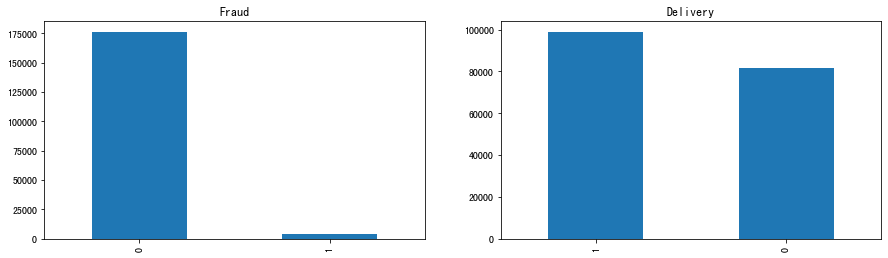

In [24]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
fraud_labels.value_counts().plot.bar(title='Fraud')

plt.subplot(1, 2, 2)
delivery_labels.value_counts().plot.bar(title='Delivery')

plt.show()

In [25]:
features.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Customer Segment,Market,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price,Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,0,Consumer,Pacific Asia,13.110000,0.04,327.75,0.29,1,327.75,314.640015,91.250000,327.75,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,1,Consumer,Pacific Asia,16.389999,0.05,327.75,-0.80,1,327.75,311.359985,-249.089996,327.75,Standard Class
2,CASH,4,4,-247.779999,309.720001,0,Consumer,Pacific Asia,18.030001,0.06,327.75,-0.80,1,327.75,309.720001,-247.779999,327.75,Standard Class
3,DEBIT,3,4,22.860001,304.809998,0,Home Office,Pacific Asia,22.940001,0.07,327.75,0.08,1,327.75,304.809998,22.860001,327.75,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,0,Corporate,Pacific Asia,29.500000,0.09,327.75,0.45,1,327.75,298.250000,134.210007,327.75,Standard Class


In [26]:
# 自然数编码
for i in ['Type', 'Market', 'Shipping Mode', 'Customer Segment']:
    features.loc[:, i] = pd.factorize(features[i])[0]
features.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Customer Segment,Market,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price,Shipping Mode
0,0,3,4,91.250000,314.640015,0,0,0,13.110000,0.04,327.75,0.29,1,327.75,314.640015,91.250000,327.75,0
1,1,5,4,-249.089996,311.359985,1,0,0,16.389999,0.05,327.75,-0.80,1,327.75,311.359985,-249.089996,327.75,0
2,2,4,4,-247.779999,309.720001,0,0,0,18.030001,0.06,327.75,-0.80,1,327.75,309.720001,-247.779999,327.75,0
3,0,3,4,22.860001,304.809998,0,1,0,22.940001,0.07,327.75,0.08,1,327.75,304.809998,22.860001,327.75,0
4,3,2,4,134.210007,298.250000,0,2,0,29.500000,0.09,327.75,0.45,1,327.75,298.250000,134.210007,327.75,0


## 特征工程

4. WOE、IV特征
5. 相关性筛选
6. 客户个人静态特征
7. 地区维度静态特征
8. 商品维度静态特征


In [27]:
# 实际发货天数与预计发货天数
features['real_scheduled'] = features['Days for shipping (real)'] - features['Days for shipment (scheduled)']

In [28]:
# RMF 特征
temp_RMF = pd.merge(raw, df_RMF, on='Customer Id')[[x for x in df_RMF.columns if x != 'Customer Id']]
features = pd.concat([features, temp_RMF], axis=1)
features = pd.get_dummies(features, columns=['RMF_level'])

In [29]:
# WOE & IV
def get_woe_and_iv(df, labels, col, strategy='distance', bins=None):

    # 数据分桶
    df = df[[col]+[labels]]

    if strategy == 'distance':
        df['bins'] = pd.cut(df[col], bins=bins)
    elif strategy == 'frequency':
        df['bins'] = pd.qcut(df[col], q=bins, duplicates='drop')
    
    woe_detail = df['bins'].value_counts().reset_index().rename(columns={'bins': 'total', 'index': 'bins'})
    
    # 计算每个属性 good(not event) 和 bad(event) 的个数
    temp = df.groupby('bins')[labels].value_counts().unstack().reset_index().rename(columns={0: 'good_total', 1: 'bad_total'})
    woe_detail = pd.merge(woe_detail, temp, on='bins', how='left')
    woe_detail.fillna(value={'good_total': 0, 'bad_total': 0}, inplace=True)
    
    # 计算每个属性 good 和 bad 的占比
    woe_detail['good_ratio'] = woe_detail['good_total'] / woe_detail['good_total'].sum()
    woe_detail['bad_ratio'] = woe_detail['bad_total'] / woe_detail['bad_total'].sum()
    
    # 计算 woe 值
    woe_detail['woe'] = np.log1p(woe_detail['bad_ratio'] / woe_detail['good_ratio'])
    woe_detail.sort_values('woe', inplace=True, ascending=False)
    
    # 计算 Odds 值
    c = woe_detail['bad_total'].sum() / woe_detail['good_total'].sum()
    woe_detail['odds'] = np.log1p(c) + woe_detail['woe']
    
    # 单调性检验
    woe_detail['Monotonicity'] = woe_detail['odds'].diff().apply(lambda x: True if x <= 0.0 else False)
    
    # 计算 IV 值
    iv_score = ((woe_detail['bad_ratio'] - woe_detail['good_ratio']) * woe_detail['woe']).sum()
    
    return woe_detail, iv_score, df['bins']

In [30]:
woe_dict = {
    'Type':{'strategy':'distance', 'bins':[-float('inf'), 0,1,2,3]},
    'Days for shipping (real)':{'strategy':'distance', 'bins':[-float('inf'), 0,1,2,3,4,5,6]},
    'Days for shipment (scheduled)':{'strategy':'distance', 'bins':[-float('inf'), 0,1,2,4]},
    'Benefit per order':{'strategy':'frequency', 'bins':[0,0.2,0.4,0.6,0.8,1]},
    'Sales per customer':{'strategy':'frequency', 'bins':[0,0.2,0.4,0.6,0.8,1]},
    'Sales per customer':{'strategy':'frequency', 'bins':[0,0.2,0.4,0.6,0.8,1]},
    'Customer Segment':{'strategy':'distance', 'bins':[-float('inf'), 0,1,2]},
    'Market':{'strategy':'distance', 'bins':[-float('inf'), 0,1,2,3,4]},
    'Order Item Discount':{'strategy':'frequency', 'bins':[0,0.2,0.4,0.6,0.8,1]},
    'Order Item Discount Rate':{'strategy':'frequency', 'bins':[0,0.2,0.4,0.6,0.8,1]},
    'Order Item Product Price':{'strategy':'frequency', 'bins':[0,0.2,0.4,0.6,0.8,1]},
    'Order Item Profit Ratio':{'strategy':'frequency', 'bins':[0,0.2,0.4,0.6,0.8,1]},
    'Order Item Quantity':{'strategy':'distance', 'bins':[0,1,2,3,4,5]},
    'Sales':{'strategy':'frequency', 'bins':[0,0.2,0.4,0.6,0.8,1]},
    'Order Item Total':{'strategy':'frequency', 'bins':[0,0.2,0.4,0.6,0.8,1]},
    'Order Profit Per Order':{'strategy':'frequency', 'bins':[0,0.2,0.4,0.6,0.8,1]},
    'Product Price':{'strategy':'frequency', 'bins':[0,0.2,0.4,0.6,0.8,1]},
    'Shipping Mode':{'strategy':'distance', 'bins':[-1,0,1,2,3]},
    'real_scheduled':{'strategy':'distance', 'bins':[-3,-2,-1,0,1,2,3,4]},
    'R':{'strategy':'frequency', 'bins':[0,0.2,0.4,0.6,0.8,1]},
    'F':{'strategy':'frequency', 'bins':[0,0.2,0.4,0.6,0.8,1]},
    'M':{'strategy':'frequency', 'bins':[0,0.2,0.4,0.6,0.8,1]},
    'R_level':{'strategy':'distance', 'bins':[0,1,2,3,4]},
    'F_level':{'strategy':'distance', 'bins':[0,1,2,3,4]},
    'M_level':{'strategy':'distance', 'bins':[0,1,2,3,4]},
    'Late_delivery_risk':{'strategy':'distance', 'bins':[-1,0,1]},
}


In [31]:
df_woe = features.copy()
df_woe['fraud_label'] = fraud_labels
df_woe['delivery_label'] = delivery_labels

In [32]:
# 诈欺 woe
for col in woe_dict:
    detail, iv_score, bins = get_woe_and_iv(df_woe, 'fraud_label', col, strategy=woe_dict[col]['strategy'], bins=woe_dict[col]['bins'])
    print(col, iv_score)
    print(detail[[x for x in detail.columns if x not in ['odds', 'Monotonicity', 'total']]])
    print('-'*20)

Type 1.1691153535380283
          bins  good_total  bad_total  good_ratio  bad_ratio       woe
1   (0.0, 1.0]     45821.0     4062.0    0.259672        1.0  1.579186
0  (-inf, 0.0]     69295.0        0.0    0.392702        0.0  0.000000
2   (2.0, 3.0]     41725.0        0.0    0.236460        0.0  0.000000
3   (1.0, 2.0]     19616.0        0.0    0.111166        0.0  0.000000
--------------------
Days for shipping (real) 0.0011673006561128043
          bins  good_total  bad_total  good_ratio  bad_ratio       woe
3   (3.0, 4.0]       27826        687    0.157693   0.169129  0.728765
1   (2.0, 3.0]       28089        676    0.159183   0.166420  0.715625
5  (-inf, 0.0]        4963        117    0.028126   0.028804  0.705123
2   (5.0, 6.0]       28073        650    0.159093   0.160020  0.696057
0   (1.0, 2.0]       55373       1245    0.313804   0.306499  0.681439
6   (0.0, 1.0]        4555        102    0.025814   0.025111  0.679439
4   (4.0, 5.0]       27578        585    0.156287   0.14

M 0.020887914842775804
                 bins  good_total  bad_total  good_ratio  bad_ratio       woe
1    (9.989, 1274.92]       35129        977    0.199080   0.240522  0.792164
3  (1871.79, 2442.82]       35149        950    0.199193   0.233875  0.776620
0  (1274.92, 1871.79]       35222        895    0.199607   0.220335  0.743767
2  (3194.74, 7736.46]       35447        653    0.200882   0.160758  0.587933
4  (2442.82, 3194.74]       35510        587    0.201239   0.144510  0.541220
--------------------
R_level 0.0001619269402760859
     bins  good_total  bad_total  good_ratio  bad_ratio       woe
1  (3, 4]       70575       1654    0.399956   0.407189  0.702149
2  (1, 2]       28154        653    0.159552   0.160758  0.696921
3  (0, 1]        5088        118    0.028834   0.029050  0.696877
0  (2, 3]       72640       1637    0.411658   0.403003  0.682579
--------------------
F_level 0.009605295823519613
     bins  good_total  bad_total  good_ratio  bad_ratio       woe
3  (0, 1]   

In [33]:
# 交货订单 woe
for col in woe_dict:
    detail, iv_score, bins = get_woe_and_iv(df_woe, 'delivery_label', col, strategy=woe_dict[col]['strategy'], bins=woe_dict[col]['bins'])
    print(col, iv_score)
    print(detail[[x for x in detail.columns if x not in ['odds', 'Monotonicity', 'total']]])
    print('-'*20)

Type 0.011835265263745079
          bins  good_total  bad_total  good_ratio  bad_ratio       woe
2   (2.0, 3.0]       17721      24004    0.217324   0.242521  0.749501
0  (-inf, 0.0]       29646      39649    0.363567   0.400588  0.742807
3   (1.0, 2.0]        8507      11109    0.104327   0.112238  0.730363
1   (0.0, 1.0]       25668      24215    0.314783   0.244653  0.575046
--------------------
Days for shipping (real) 1.5343518873552209
          bins  good_total  bad_total  good_ratio  bad_ratio       woe
4   (4.0, 5.0]      1160.0    27003.0    0.014226   0.272821  3.004588
2   (5.0, 6.0]      1234.0    27489.0    0.015133   0.277731  2.962812
6   (0.0, 1.0]       203.0     4454.0    0.002490   0.045000  2.948429
0   (1.0, 2.0]     30105.0    26513.0    0.369196   0.267870  0.545546
3   (3.0, 4.0]     21754.0     6759.0    0.266783   0.068289  0.227909
1   (2.0, 3.0]     22006.0     6759.0    0.269873   0.068289  0.225572
5  (-inf, 0.0]      5080.0        0.0    0.062299   0.000

       bins  good_total  bad_total  good_ratio  bad_ratio       woe
5    (2, 3]       280.0     6772.0    0.003434   0.068420  3.040961
2    (1, 2]      1167.0    27551.0    0.014312   0.278358  3.017970
6    (3, 4]       286.0     6697.0    0.003507   0.067662  3.010192
0    (0, 1]      2690.0    57957.0    0.032989   0.585560  2.931199
1   (-1, 0]     33753.0        0.0    0.413934   0.000000  0.000000
3  (-2, -1]     21700.0        0.0    0.266121   0.000000  0.000000
4  (-3, -2]     21666.0        0.0    0.265704   0.000000  0.000000
--------------------
R 0.0004218590479392959
              bins  good_total  bad_total  good_ratio  bad_ratio       woe
0   (361.0, 558.0]       16032      20220    0.196610   0.204290  0.712489
4   (716.0, 930.0]       16037      19879    0.196672   0.200845  0.703700
2   (558.0, 716.0]       16246      19840    0.199235   0.200451  0.696194
3  (930.0, 1126.0]       16496      19548    0.202301   0.197500  0.681212
1  (-0.001, 361.0]       16731      

In [34]:
# # 相关性筛选
# plt.figure(figsize=(10, 10))
# corr = features.corr()
# plt.imshow(corr, cmap='hot')
# for i in range(len(corr)):
#     for j in range(len(corr)):
#         plt.text(i, j, round(corr.values[i][j], 1), ha='center')
# plt.xticks([x for x in range(len(corr))], corr.columns, rotation='vertical')
# plt.yticks([x for x in range(len(corr))], corr.columns)
# plt.colorbar()
# plt.show()

In [35]:
features_drop = features.copy()

# 预测任务

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error

In [38]:
def print_info(y_pre, y_proba, y_true):
    print('acc: {:.2f}%'.format(accuracy_score(y_true,y_pre)*100))
    print('pre: {:.2f}%'.format(precision_score(y_true,y_pre)*100))
    print('rec: {:.2f}%'.format(recall_score(y_true,y_pre)*100))
    print('f1 : {:.2f}%'.format(f1_score(y_true,y_pre)*100))
    print('auc: {:.2f}%'.format(roc_auc_score(y_true,y_pre)*100))

##  欺诈订单预测

In [39]:
features.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Customer Segment', 'Market', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Product Price',
       'Shipping Mode', 'real_scheduled', 'R', 'R_level', 'F', 'F_level', 'M',
       'M_level', 'RMF_level_一般价值用户', 'RMF_level_一般保持用户', 'RMF_level_一般发展用户',
       'RMF_level_一般挽留用户', 'RMF_level_重要价值用户', 'RMF_level_重要保持用户',
       'RMF_level_重要发展用户', 'RMF_level_重要挽留用户'],
      dtype='object')

In [40]:
features_for_fraud = features.copy()

# 标准化数据
features_ready = StandardScaler().fit_transform(features_for_fraud)

# 拆分数据
train_x, val_x, train_fraud_y, val_fraud_y = train_test_split(features_ready, fraud_labels, test_size=0.2, random_state=526)

# 模型拟合
fraud_lr = LogisticRegression()
fraud_lr.fit(train_x, train_fraud_y)
fraud_pre = fraud_lr.predict(val_x)
fraud_proba = fraud_lr.predict_proba(val_x)
print_info(fraud_pre, fraud_proba, val_fraud_y)

acc: 97.66%
pre: 52.48%
rec: 14.82%
f1 : 23.11%
auc: 57.25%


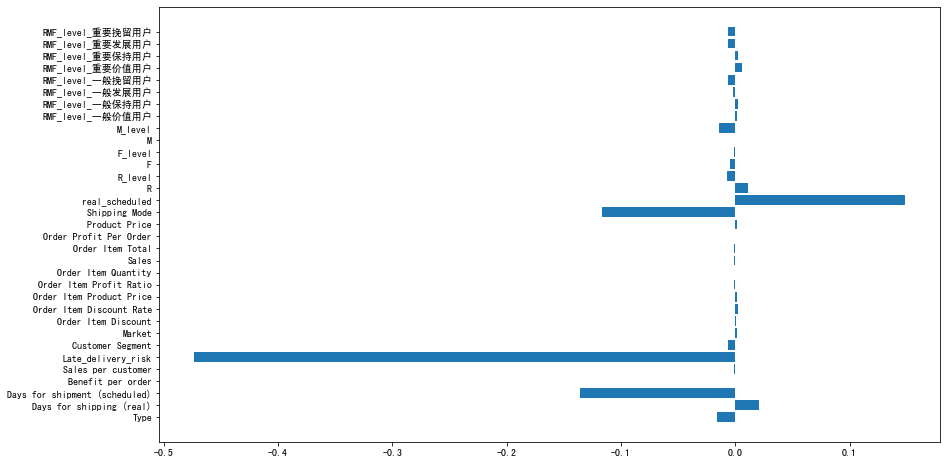

In [41]:
plt.figure(figsize=(14, 8))
plt.barh([x for x in range(len(features_for_fraud.columns))], (fraud_lr.coef_ / np.abs(fraud_lr.coef_).sum())[0])
plt.yticks([x for x in range(len(features_for_fraud.columns))], features_for_fraud.columns)
plt.show()

### SMOTE 过采样

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
# 过采样
over_samples = SMOTE(random_state=None, k_neighbors=5)
over_samples_X, over_samples_y = over_samples.fit_sample(train_x, train_fraud_y.ravel())

fraud_lr = LogisticRegression()
fraud_lr.fit(over_samples_X, over_samples_y)
fraud_pre = fraud_lr.predict(val_x)
fraud_proba = fraud_lr.predict_proba(val_x)
print_info(fraud_pre, fraud_proba, val_fraud_y)

acc: 76.26%
pre: 7.78%
rec: 82.96%
f1 : 14.23%
auc: 79.53%


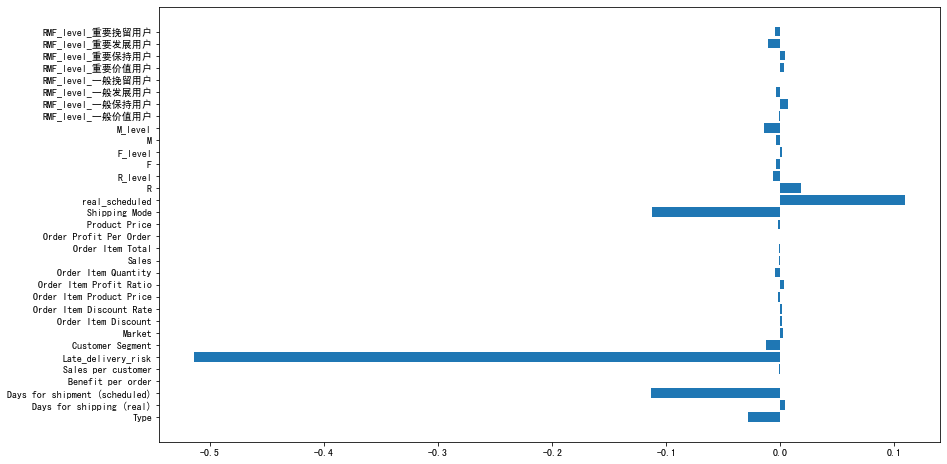

In [44]:
plt.figure(figsize=(14, 8))
plt.barh([x for x in range(len(features_for_fraud.columns))], (fraud_lr.coef_ / np.abs(fraud_lr.coef_).sum())[0])
plt.yticks([x for x in range(len(features_for_fraud.columns))], features_for_fraud.columns)
plt.show()

## 交货订单预测

In [45]:
features_for_delivery = features[['Days for shipping (real)', 'Days for shipment (scheduled)', 'Shipping Mode', 'real_scheduled']]

# 标准化数据
features_ready_delivery = StandardScaler().fit_transform(features_for_delivery)

# 拆分数据
train_x, val_x, train_delivery_y, val_delivery_y = train_test_split(features_ready_delivery, delivery_labels, test_size=0.2, random_state=526)

# 模型拟合
delivery_lr = LogisticRegression()
delivery_lr.fit(train_x, train_delivery_y)
delivery_pre = delivery_lr.predict(val_x)
delivery_proba = delivery_lr.predict_proba(val_x)
print_info(delivery_pre, delivery_proba, val_delivery_y)

acc: 97.44%
pre: 95.49%
rec: 100.00%
f1 : 97.70%
auc: 97.21%


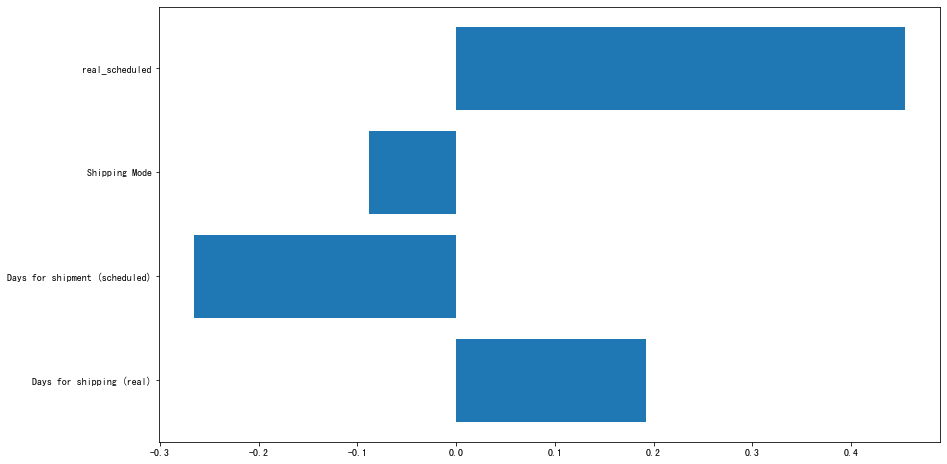

In [46]:
plt.figure(figsize=(14, 8))
plt.barh([x for x in range(len(features_for_delivery.columns))], (delivery_lr.coef_ / np.abs(delivery_lr.coef_).sum())[0])
plt.yticks([x for x in range(len(features_for_delivery.columns))], features_for_delivery.columns)
plt.show()

## 销量预测

In [47]:
# 数据拆分
label_sale = features['Sales']
train_sale = features.drop(['Sales', 'Sales per customer', 'Order Item Total'], axis=1)

# 数据规范化
train_sale = StandardScaler().fit_transform(train_sale)

# 拆分
train_for_sale, val_for_sale, train_y_sale, val_y_sale = train_test_split(train_sale, label_sale, test_size=0.2, random_state=1234)

In [48]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [53]:
for model in [LinearRegression(), Lasso(), Ridge()]:
    model.fit(train_for_sale, train_y_sale)
    predict = model.predict(val_for_sale)
    print(model, mean_absolute_error(val_y_sale, predict))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 18.885067655098847
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) 18.38879575518595
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 18.885143450383925


## 订单数量预测

In [57]:
# 数据拆分
label_quantity = features['Order Item Quantity']
train_sale = features.drop(['Order Item Quantity'], axis=1)

# 数据规范化
train_quantity = StandardScaler().fit_transform(train_sale)

# 拆分
train_for_quantity, val_for_quantity, train_y_quantity, val_y_quantity = train_test_split(train_quantity, label_quantity, test_size=0.2, random_state=1234)

In [58]:
for model in [LinearRegression(), Lasso(), Ridge()]:
    model.fit(train_for_quantity, train_y_quantity)
    predict = model.predict(val_for_quantity)
    print(model, mean_absolute_error(val_y_quantity, predict))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 0.3723468339040434
Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) 1.2639312859519982
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) 0.37323768550709246
